##### This guide uses tf.keras, a high-level API to build and train models in TensorFlow.

In [4]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.6.0


##### Import the Fashion MNIST dataset

In [17]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(train_images.shape)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 
               'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

(60000, 28, 28)


##### Preprocess the data

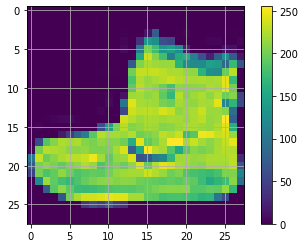

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(True)
plt.show()

In [13]:
train_images = train_images / 255.0
test_iamges = test_images / 255.0

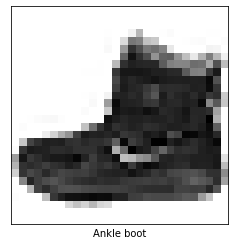

In [21]:
plt.figure()
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.xlabel(class_names[train_labels[0]])
plt.show()

##### Build the model

##### Set up the layers

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 731us/step - loss: 3.8669 - accuracy: 0.6930
Epoch 2/10
1875/1875 [==============================] - 1s 787us/step - loss: 0.6722 - accuracy: 0.7500
Epoch 3/10
1875/1875 [==============================] - 1s 725us/step - loss: 0.5689 - accuracy: 0.7968
Epoch 4/10
1875/1875 [==============================] - 1s 728us/step - loss: 0.5403 - accuracy: 0.8124
Epoch 5/10
1875/1875 [==============================] - 1s 783us/step - loss: 0.5125 - accuracy: 0.8220
Epoch 6/10
1875/1875 [==============================] - 1s 762us/step - loss: 0.4986 - accuracy: 0.8297
Epoch 7/10
1875/1875 [==============================] - 2s 818us/step - loss: 0.4892 - accuracy: 0.8310
Epoch 8/10
1875/1875 [==============================] - 2s 813us/step - loss: 0.4767 - accuracy: 0.8365
Epoch 9/10
1875/1875 [==============================] - 1s 731us/step - loss: 0.4656 - accuracy: 0.8427
Epoch 10/10
1875/1875 [==============================] - 1s 734u

In [23]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.6273 - accuracy: 0.8100

Test accuracy: 0.8100000023841858


In [26]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

print(np.argmax(predictions[0]))
print(np.argmax(predictions[1]))

9
2


In [28]:
img = test_images[1]
print(img.shape)

img = (np.expand_dims(img, 0))
print(img.shape)

predictions_single = probability_model.predict(img)

print(np.argmax(predictions_single))

(28, 28)
(1, 28, 28)
2
